In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os

In [2]:
data_N = pd.read_csv('./known_structures/results_compiled_N.csv')
data_H = pd.read_csv('./known_structures/results_compiled_H.csv')  

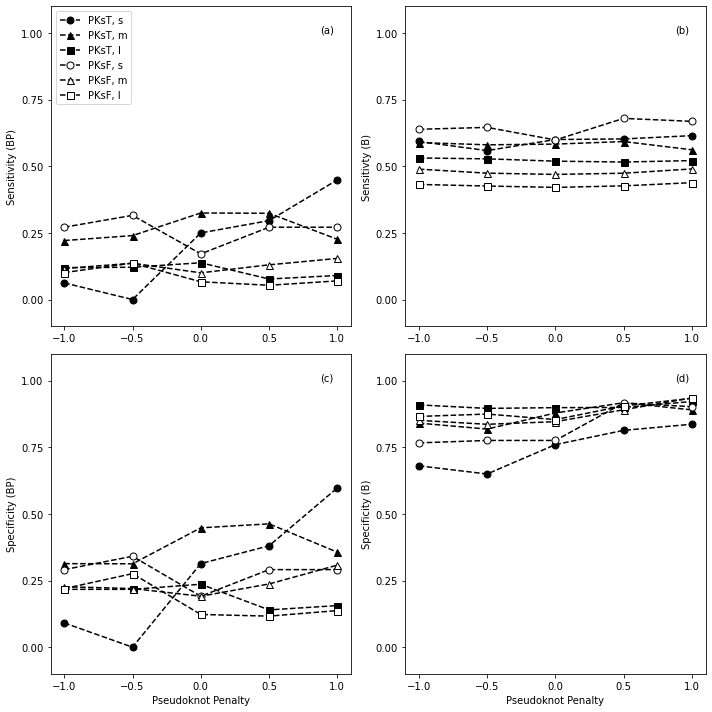

In [3]:
# plot 1 (N): show sensitivity and specificity as a function of pseudoknot penalty

plot1N_data_mean = data_N.groupby(['pks', 'size', 'pk_penalty'], as_index = False).mean()
plot1N_data_var  = data_N.groupby(['pks', 'size', 'pk_penalty'], as_index = False).var()

sizes  = ['s', 'm', 'l']

PK     = ['T', 'F']
series = ['sensitivity_bp', 'sensitivity_b', 'specificity_bp', 'specificity_b']
slabel = ["Sensitivity (BP)", "Sensitivty (B)", "Specificity (BP)", "Specificity (B)"]
plabel = ["(a)", "(b)", "(c)", "(d)"]
shape  = ['o', '^', 's']
colour = ['black', 'white']

fig = plt.subplots(2, 2, figsize=(10, 10))

for i in range(0, len(series)):
    
    plt.subplot(2, 2, i+1)

    ax = plt.gca()
    ax.set_ylim([-0.1, 1.1]) 
    plt.yticks(np.arange(0.0, 1.1, step=0.25))
    #ax.set_xlim([-0.1, 1.1]) 
    plt.xticks(np.arange(-1, 1.5, step=0.5))
    plt.ylabel(slabel[i])
    if i == 2 or i == 3:
        plt.xlabel("Pseudoknot Penalty")
    
    ax.annotate(plabel[i], xy = (0.875, 1.0))
    
    for j in range(0, len(PK)):
        for k in range(0, len(sizes)):
            temp_mean = plot1N_data_mean[(plot1N_data_mean['pks'] == PK[j]) & (plot1N_data_mean['size'] == sizes[k])]
            temp_var  = plot1N_data_var[(plot1N_data_var['pks'] == PK[j]) & (plot1N_data_var['size'] == sizes[k])]
            plt.plot(np.array(temp_mean['pk_penalty']), np.array(temp_mean[series[i]]), marker = shape[k], color = 'black',
                     markerfacecolor = colour[j], markeredgecolor = 'black', markeredgewidth = 1, linestyle='dashed', 
                     label = 'PKs'+PK[j]+', '+sizes[k], markersize = 7)
    if i == 0:
        plt.legend(loc = 'upper left')
        
plt.tight_layout()

plt.savefig("C:/Users/tsmza/OneDrive/Documents/graduate_school/_CSC525/project/RNA-Folding/figures/plot1_N.png", bbox_inches='tight')

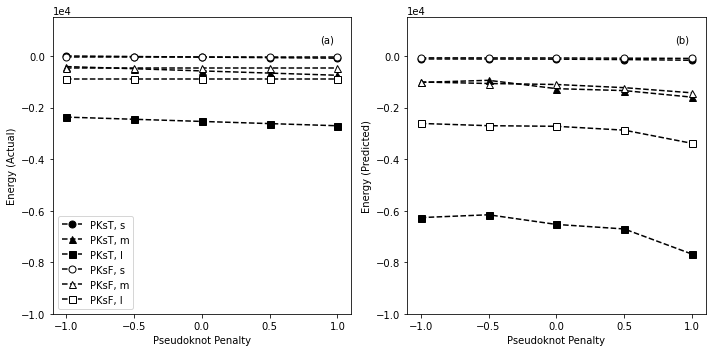

In [4]:
# plot 2 (N): show energy as a function of pseudoknot penalty

plot2N_data_mean = data_N.groupby(['pks', 'size', 'pk_penalty'], as_index = False).mean()
plot2N_data_var  = data_N.groupby(['pks', 'size', 'pk_penalty'], as_index = False).var()

sizes  = ['s', 'm', 'l']

PK     = ['T', 'F']
series = ['energy_actual', 'energy_predicted']
slabel = ["Energy (Actual)", "Energy (Predicted)"]
plabel = ["(a)", "(b)"]
shape  = ['o', '^', 's']
colour = ['black', 'white']

fig = plt.subplots(1, 2, figsize=(10, 5))

for i in range(0, len(series)):
    
    plt.subplot(1, 2, i+1)

    ax = plt.gca()
    ax.set_ylim([-1e4, 1.5e3]) 
    #plt.yticks(np.arange(0.0, 1.1, step=0.25))
    #ax.set_xlim([-0.1, 1.1]) 
    plt.xticks(np.arange(-1, 1.5, step=0.5))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ylabel(slabel[i])
    plt.xlabel("Pseudoknot Penalty")
    
    ax.annotate(plabel[i], xy = (0.875, 500))
    
    for j in range(0, len(PK)):
        for k in range(0, len(sizes)):
            temp_mean = plot2N_data_mean[(plot2N_data_mean['pks'] == PK[j]) & (plot2N_data_mean['size'] == sizes[k])]
            temp_var  = plot2N_data_var[(plot2N_data_var['pks'] == PK[j]) & (plot2N_data_var['size'] == sizes[k])]
            plt.plot(np.array(temp_mean['pk_penalty']), np.array(temp_mean[series[i]]), marker = shape[k], color = 'black',
                     markerfacecolor = colour[j], markeredgecolor = 'black', markeredgewidth = 1, linestyle='dashed', 
                     label = 'PKs'+PK[j]+', '+sizes[k], markersize = 7)
    if i == 0:
        plt.legend(loc = 'lower left')
        
plt.tight_layout()

plt.savefig("C:/Users/tsmza/OneDrive/Documents/graduate_school/_CSC525/project/RNA-Folding/figures/plot2_N.png", bbox_inches='tight')

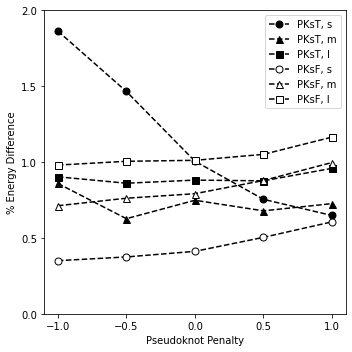

In [5]:
# plot 3 (N): show percent difference in energy as a function of pseudoknot penalty

plot3N_data_mean = data_N.groupby(['pks', 'size', 'pk_penalty'], as_index = False).mean()
plot3N_data_var  = data_N.groupby(['pks', 'size', 'pk_penalty'], as_index = False).var()

sizes  = ['s', 'm', 'l']

PK     = ['T', 'F']
series = ['energy_actual', 'energy_predicted']
slabel = "% Energy Difference"
shape  = ['o', '^', 's']
colour = ['black', 'white']

fig = plt.subplots(1, 1, figsize=(5, 5))

plt.subplot(1, 1, 1)

ax = plt.gca()
ax.set_ylim([0, 2.0]) 
plt.yticks(np.arange(0.0, 2.1, step=0.5))
#ax.set_xlim([-0.1, 1.1]) 
plt.xticks(np.arange(-1, 1.5, step=0.5))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel(slabel)
plt.xlabel("Pseudoknot Penalty")
    
for j in range(0, len(PK)):
    for k in range(0, len(sizes)):
        temp_mean = plot3N_data_mean[(plot3N_data_mean['pks'] == PK[j]) & (plot3N_data_mean['size'] == sizes[k])]
        temp_var  = plot3N_data_var[(plot3N_data_var['pks'] == PK[j]) & (plot3N_data_var['size'] == sizes[k])]
        
        x = abs(np.array(temp_mean[series[0]]))
        y = abs(np.array(temp_mean[series[1]]))
        z = abs(x-y)/((x+y)/2)     
        
        plt.plot(np.array(temp_mean['pk_penalty']), z, marker = shape[k], color = 'black',
                 markerfacecolor = colour[j], markeredgecolor = 'black', markeredgewidth = 1, linestyle='dashed', 
                 label = 'PKs'+PK[j]+', '+sizes[k], markersize = 7)

plt.legend(loc = 'upper right')
        
plt.tight_layout()

plt.savefig("C:/Users/tsmza/OneDrive/Documents/graduate_school/_CSC525/project/RNA-Folding/figures/plot3_N.png", bbox_inches='tight')

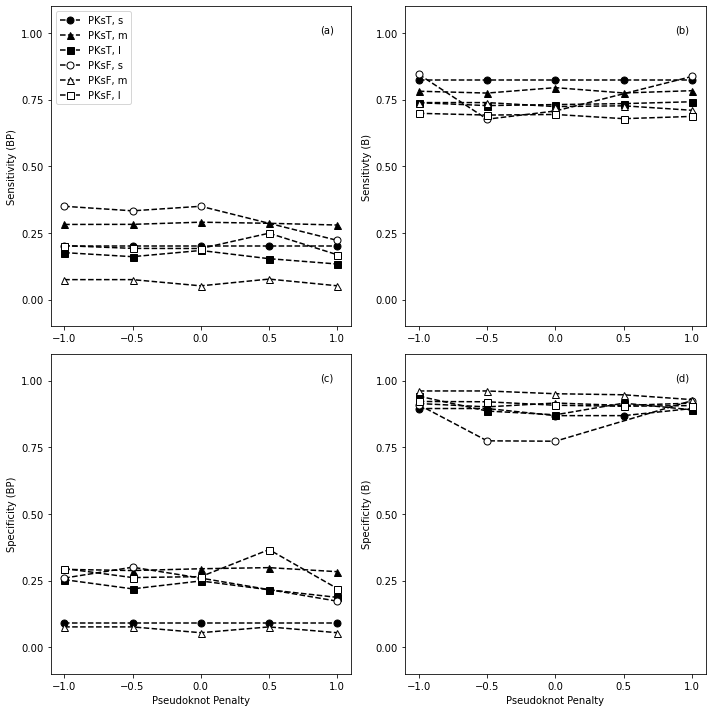

In [6]:
# plot 1 (H): show sensitivity and specificity as a function of pseudoknot penalty

plot1H_data_mean = data_H.groupby(['pks', 'size', 'pk_penalty'], as_index = False).mean()
plot1H_data_var  = data_H.groupby(['pks', 'size', 'pk_penalty'], as_index = False).var()

sizes  = ['s', 'm', 'l']

PK     = ['T', 'F']
series = ['sensitivity_bp', 'sensitivity_b', 'specificity_bp', 'specificity_b']
slabel = ["Sensitivity (BP)", "Sensitivty (B)", "Specificity (BP)", "Specificity (B)"]
plabel = ["(a)", "(b)", "(c)", "(d)"]
shape  = ['o', '^', 's']
colour = ['black', 'white']

fig = plt.subplots(2, 2, figsize=(10, 10))

for i in range(0, len(series)):
    
    plt.subplot(2, 2, i+1)

    ax = plt.gca()
    ax.set_ylim([-0.1, 1.1]) 
    plt.yticks(np.arange(0.0, 1.1, step=0.25))
    #ax.set_xlim([-0.1, 1.1]) 
    plt.xticks(np.arange(-1, 1.5, step=0.5))
    plt.ylabel(slabel[i])
    if i == 2 or i == 3:
        plt.xlabel("Pseudoknot Penalty")
    
    ax.annotate(plabel[i], xy = (0.875, 1.0))
    
    for j in range(0, len(PK)):
        for k in range(0, len(sizes)):
            temp_mean = plot1H_data_mean[(plot1H_data_mean['pks'] == PK[j]) & (plot1H_data_mean['size'] == sizes[k])]
            temp_var  = plot1H_data_var[(plot1H_data_var['pks'] == PK[j]) & (plot1H_data_var['size'] == sizes[k])]
            plt.plot(np.array(temp_mean['pk_penalty']), np.array(temp_mean[series[i]]), marker = shape[k], color = 'black',
                     markerfacecolor = colour[j], markeredgecolor = 'black', markeredgewidth = 1, linestyle='dashed', 
                     label = 'PKs'+PK[j]+', '+sizes[k], markersize = 7)
    if i == 0:
        plt.legend(loc = 'upper left')
        
plt.tight_layout()

plt.savefig("C:/Users/tsmza/OneDrive/Documents/graduate_school/_CSC525/project/RNA-Folding/figures/plot1_H.png", bbox_inches='tight')

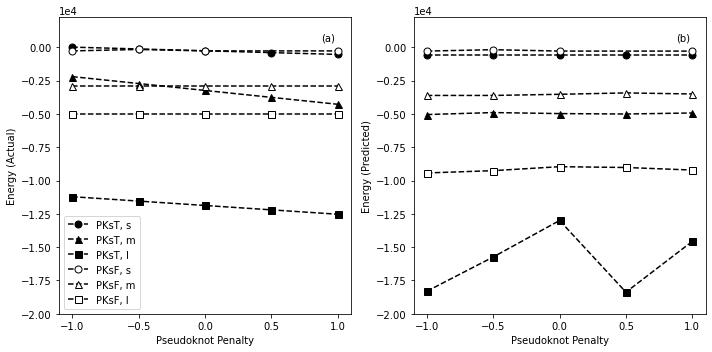

In [12]:
# plot 2 (H): show energy as a function of pseudoknot penalty

plot2H_data_mean = data_H.groupby(['pks', 'size', 'pk_penalty'], as_index = False).mean()
plot2H_data_var  = data_H.groupby(['pks', 'size', 'pk_penalty'], as_index = False).var()

sizes  = ['s', 'm', 'l']

PK     = ['T', 'F']
series = ['energy_actual', 'energy_predicted']
slabel = ["Energy (Actual)", "Energy (Predicted)"]
plabel = ["(a)", "(b)"]
shape  = ['o', '^', 's']
colour = ['black', 'white']

fig = plt.subplots(1, 2, figsize=(10, 5))

for i in range(0, len(series)):
    
    plt.subplot(1, 2, i+1)

    ax = plt.gca()
    ax.set_ylim([-2e4, 2.25e3]) 
    #plt.yticks(np.arange(0.0, 1.1, step=0.25))
    #ax.set_xlim([-0.1, 1.1]) 
    plt.xticks(np.arange(-1, 1.5, step=0.5))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ylabel(slabel[i])
    plt.xlabel("Pseudoknot Penalty")
    
    ax.annotate(plabel[i], xy = (0.875, 500))
    
    for j in range(0, len(PK)):
        for k in range(0, len(sizes)):
            temp_mean = plot2H_data_mean[(plot2H_data_mean['pks'] == PK[j]) & (plot2H_data_mean['size'] == sizes[k])]
            temp_var  = plot2H_data_var[(plot2H_data_var['pks'] == PK[j]) & (plot2H_data_var['size'] == sizes[k])]
            plt.plot(np.array(temp_mean['pk_penalty']), np.array(temp_mean[series[i]]), marker = shape[k], color = 'black',
                     markerfacecolor = colour[j], markeredgecolor = 'black', markeredgewidth = 1, linestyle='dashed', 
                     label = 'PKs'+PK[j]+', '+sizes[k], markersize = 7)
    if i == 0:
        plt.legend(loc = 'lower left')
        
plt.tight_layout()

plt.savefig("C:/Users/tsmza/OneDrive/Documents/graduate_school/_CSC525/project/RNA-Folding/figures/plot2_H.png", bbox_inches='tight')

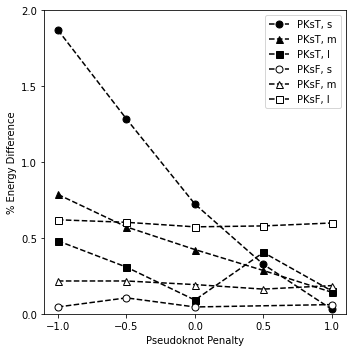

In [13]:
# plot 3 (H): show percent difference in energy as a function of pseudoknot penalty

plot3H_data_mean = data_H.groupby(['pks', 'size', 'pk_penalty'], as_index = False).mean()
plot3H_data_var  = data_H.groupby(['pks', 'size', 'pk_penalty'], as_index = False).var()

sizes  = ['s', 'm', 'l']

PK     = ['T', 'F']
series = ['energy_actual', 'energy_predicted']
slabel = "% Energy Difference"
shape  = ['o', '^', 's']
colour = ['black', 'white']

fig = plt.subplots(1, 1, figsize=(5, 5))

plt.subplot(1, 1, 1)

ax = plt.gca()
ax.set_ylim([0, 2.0]) 
plt.yticks(np.arange(0.0, 2.1, step=0.5))
#ax.set_xlim([-0.1, 1.1]) 
plt.xticks(np.arange(-1, 1.5, step=0.5))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel(slabel)
plt.xlabel("Pseudoknot Penalty")
    
for j in range(0, len(PK)):
    for k in range(0, len(sizes)):
        temp_mean = plot3H_data_mean[(plot3H_data_mean['pks'] == PK[j]) & (plot3H_data_mean['size'] == sizes[k])]
        temp_var  = plot3H_data_var[(plot3H_data_var['pks'] == PK[j]) & (plot3H_data_var['size'] == sizes[k])]
        
        x = abs(np.array(temp_mean[series[0]]))
        y = abs(np.array(temp_mean[series[1]]))
        z = abs(x-y)/((x+y)/2)     
        
        plt.plot(np.array(temp_mean['pk_penalty']), z, marker = shape[k], color = 'black',
                 markerfacecolor = colour[j], markeredgecolor = 'black', markeredgewidth = 1, linestyle='dashed', 
                 label = 'PKs'+PK[j]+', '+sizes[k], markersize = 7)

plt.legend(loc = 'upper right')
        
plt.tight_layout()

plt.savefig("C:/Users/tsmza/OneDrive/Documents/graduate_school/_CSC525/project/RNA-Folding/figures/plot3_H.png", bbox_inches='tight')